# CS2006 Python Practical 2  
 Tutor: Stephen Linton  
 2024-3-29
* Student A - 230015014  
* Student B - 220024634   
* Student C - 220010065  

In this practical, we are given a dataset containing a sample of 1% of people in the 2011 Census database for England and Wales. We are asked to analyze this dataset using programs written by us and using components of the Python ecosystem. Our project thoroughly refines the data, describes it accurately, is repeatable, replicable, reproducible and resuable. All analytics can be executed with any data set of similar structure.

In [1]:
import pandas as pd
import sys 
import os

sys.path.append("../code")

import consistency

### Refining the dataset
We start with exploring the content of the raw data.

In [2]:
df = pd.read_csv("../data/census2011.csv")
df

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569736,7946020,W92000004,H,1,1,1,5,1,2,1,4,1,9,1,8,8,3,3
569737,7944310,W92000004,H,3,1,1,3,1,2,1,2,1,1,1,7,4,3,4
569738,7945374,W92000004,H,3,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,-9
569739,7944768,W92000004,H,1,1,2,8,5,2,1,3,1,9,5,9,2,-9,4


We will first refine the data in order to handle inconsistencies before further analysis.  

We consider inconsistencies to be:  
* 0-15 age range and any form of marital status other than single
* Any mismatched 'no codes' to do with student status
* Anyone marked as working and in very bad health
* Anyone with very bad health who is not marked as sick or disabled

In [3]:
consistency.cleanDataFrame(df)

Checking for problem values...
Value checking finished.
Checking types...
Discrepancy of type in column  Residence Type expected string found object
Type checking finished.
Retyping columns ['Residence Type'] ...
Retyping Residence Type from <class 'str'> to string
Retyping finished
>> Checking Age == 0-15
Requirement: [<MaritalStatusOptions: 1 -> SINGLE>] - CONTRADICTION
        Age Age DESC  Marital Status  \
26774     1     0-15               2   
26821     1     0-15               2   
207835    1     0-15               2   
452434    1     0-15               2   
467282    1     0-15               2   
480533    1     0-15               2   
499946    1     0-15               2   
511216    1     0-15               2   
546848    1     0-15               2   
554079    1     0-15               4   
555682    1     0-15               5   

                                      Marital Status DESC  
26774   Married or in a registered same-sex civil part...  
26821   Married or in a 

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569736,7946020,W92000004,H,1,1,1,5,1,2,1,4,1,9,1,8,8,3,3
569737,7944310,W92000004,H,3,1,1,3,1,2,1,2,1,1,1,7,4,3,4
569738,7945374,W92000004,H,3,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,-9
569739,7944768,W92000004,H,1,1,2,8,5,2,1,3,1,9,5,9,2,-9,4


In [4]:
df["Residence Type"]

0         H
1         H
2         H
3         H
4         H
         ..
569736    H
569737    H
569738    H
569739    H
569740    H
Name: Residence Type, Length: 569741, dtype: string

Then, save the cleaned data to a separate file so we can reuse it later.

In [5]:
cleanPath = "../data/census2011-clean.csv"
df.to_csv(cleanPath) # save to csv
df = pd.read_csv(cleanPath) # set dataframe to cleaned data

To recreate this step, navigate to the parent directory, then execute the `./run_consistency` script which takes a csv path as a parameter

### Design: Refining the data - Students A & B
Initially, we simply enumerated the possible values of each column and tested
each column.
This was a very simplistic approach, and allowed us to rapidly evaluate 
the quality of the data.
By first doing a quick analysis of the data, we were able to make an informed
decision of how to handle invalid data.
Since there were no invalid values we decided that future datasets would be
unlikely to have a large amount of invalid data, and so we decided to
remove any invalid rows from the data set.
If there were a large number of invalid rows, this could cause issues as the
sample used for analysis may not be fully representative of the original data,
and could lead us to draw invalid conclusions.


We wanted to make cleaning and verification data extensible to other data sets,
but our current way would need to be completely rewritten for a new data set
with new columns. Therefore, we developed `OptionEnum`, that extends `Enum`,
and stores a mapping of key to description. We can now easily work with the
data set, listing all possible values with their descriptions as well as parsing.

In [6]:
import census_microdata_2011 as md
[f"{x.key()}: {x.desc()}" for x in md.EthnicityOptions]

['1: White',
 '2: Mixed',
 '3: Asian or Asian British',
 '4: Black or Black British',
 '5: Chinese or Other ethnic group',
 '-9: No code required (Not resident in england or wales, students or schoolchildren living away during term-time)']

We can also use this to easily search for a particular value in the dataset


In [7]:
df.loc[df["Age"] == md.AgeOptions.FROM_35_TO_44.key()]

,Unnamed: 0,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
1,1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
6,6,7394871,E12000001,H,5,1,2,4,3,2,1,2,1,1,1,6,11,2,3
18,18,7395059,E12000001,H,1,1,1,4,1,2,1,3,1,1,1,8,2,3,4
22,22,7394857,E12000001,H,2,1,1,4,2,2,1,1,1,1,1,8,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569685,569685,7944687,W92000004,H,2,1,1,4,1,2,1,2,1,2,1,8,4,3,4
569693,569693,7945171,W92000004,H,2,1,2,4,2,2,1,1,1,2,1,4,4,2,2
569706,569706,7946284,W92000004,H,1,1,2,4,1,2,1,1,1,3,1,3,11,3,2
569725,569725,7945073,W92000004,H,1,1,2,4,1,2,1,1,1,2,1,4,11,3,2


And easily translate the cryptic key names into the descriptive strings

In [8]:
df["Residence Type"].replace(md.ResidenceOptions.mappings)

0         Not resident in a communal establishment
1         Not resident in a communal establishment
2         Not resident in a communal establishment
3         Not resident in a communal establishment
4         Not resident in a communal establishment
                            ...                   
569736    Not resident in a communal establishment
569737    Not resident in a communal establishment
569738    Not resident in a communal establishment
569739    Not resident in a communal establishment
569740    Not resident in a communal establishment
Name: Residence Type, Length: 569741, dtype: object

### Descriptive analysis of cleaned data - Student B

For this basic requirement we were asked to obtain:  
* the total number of records in the dataset
* the type of each variable in the dataset
* all different values that each variable takes and the number of occurences for each value (excluding Person ID)

To encapsulate this entire requirement, we implemented `printSummary`

In [9]:
import stats as s
s.printSummary(df)

Number of Records: 569741
Column types-----------
Person ID                     int64
Region                       object
Residence Type               object
Family Composition            int64
Population Base               int64
Sex                           int64
Age                           int64
Marital Status                int64
Student                       int64
Country of Birth              int64
Health                        int64
Ethnic Group                  int64
Religion                      int64
Economic Activity             int64
Occupation                    int64
Industry                      int64
Hours worked per week         int64
Approximated Social Grade     int64
dtype: object

Region  E12000008  E12000007  E12000002  E12000006  E12000005  E12000009  E12000003  E12000004  W92000004  E12000001
count       88084      83582      71436      59411      56875      53774      53471      45782      30977      26349

Residence Type       H      C
count           559087

To see the counts of an individual column, use `getUniqueCounts`

In [10]:
s.getUniqueCounts(df["Country of Birth"])

,Country of Birth,count
0,1,485645
1,2,77292
2,-9,6804


To recreate this step, navigate to the parent directory, then execute the `./run_summary` script which takes a csv path as a parameter

The second part of the descriptive analysis, we were told to build the following plots:
* bar chart for the number of records for each region  
* bar chart for the number of records for each occupation  
* pie chart for the distribution of the sample by age  
* pie chart for the distribution of the sample by the economic activity.  

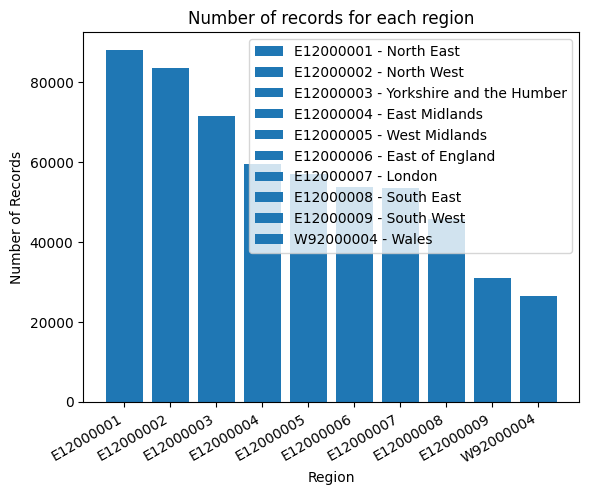

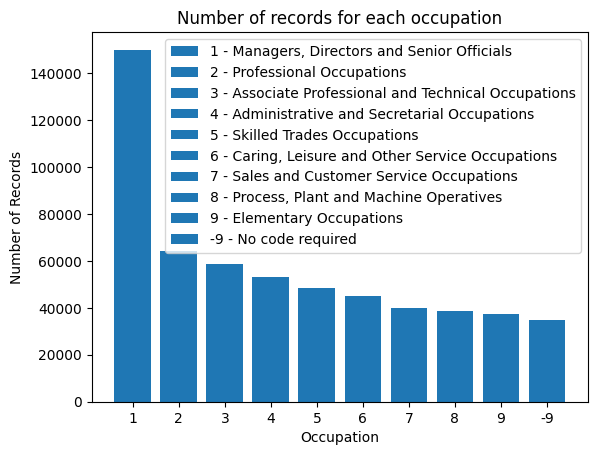

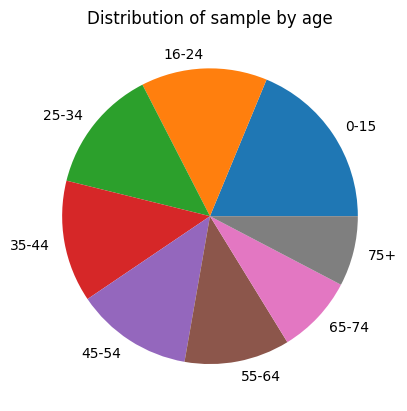

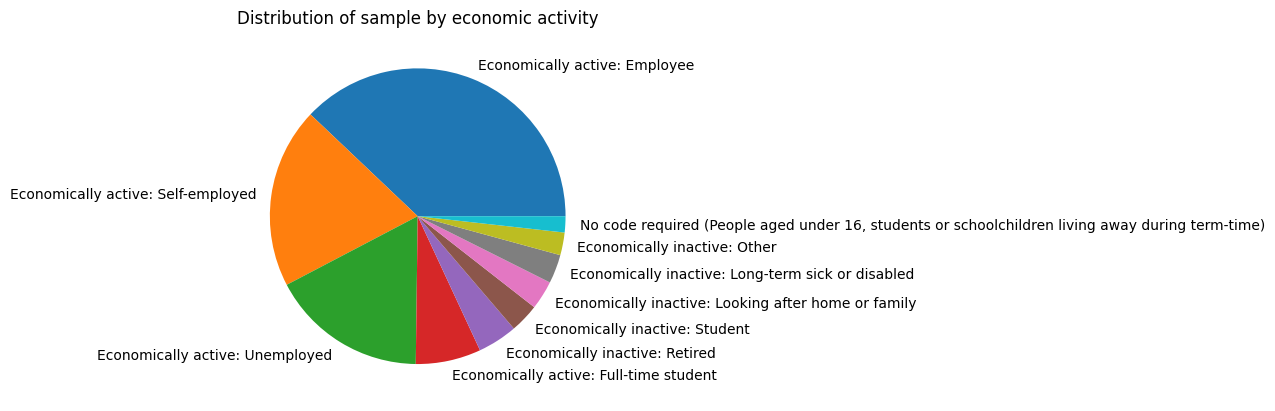

In [11]:
%matplotlib inline

import basic_plots as b

b.genRecordBarPlot(df, 'Region', False)
b.genRecordBarPlot(df, 'Occupation', False)
b.genDistPieChart(df, 'Age', False)
b.genDistPieChart(df, 'Economic Activity', False)

#b.interact(b.genRecordBarPlot(df, 'Region', True), df=b.fixed(df), colName=b.Dropdown(options=df.columns))
#b.interact(b.genRecordBarPlot(df, 'Occupation', True), df=b.fixed(df), colName=b.Dropdown(options=df.columns))
#b.interact(b.genDistPieChart(df, 'Age', True), df=b.fixed(df), colName=b.Dropdown(options=df.columns))
#b.interact(b.genDistPieChart(df, 'Economic Activity', True), df=b.fixed(df), colName=b.Dropdown(options=df.columns))

To recreate this step, navigate to the parent directory, then execute the `./run_plots` script which takes a csv path as a parameter and assumes the existence of "Region", "Occupation", "Age" and "Economic Activity" as columns. When running the script, the plots will be saved as png images in the images directory.

### Using groupby to produce tables - Student B

We were asked to produce the following tables:  
* number of records by region and industry  
* number of records by occupation and social grade  

To make this functionality easy to reuse, we wrote one function, `getGroupTable` which takes a dataframe and two column names and produces a table showing the number of records for the pair of columns in the given dataframe. This can be done with any pair of columns in the given dataframe.

In [12]:
s.getGroupTable(df, "Region", "Industry")

,Region,Industry,counts
0,E12000001,-9,6854
1,E12000001,4,3087
2,E12000001,2,2851
3,E12000001,11,2524
4,E12000001,8,1883
...,...,...,...
125,W92000004,5,1641
126,W92000004,6,1500
127,W92000004,12,992
128,W92000004,7,594


In [13]:
s.getGroupTable(df, "Occupation", "Approximated Social Grade")

,Occupation,Approximated Social Grade,counts
0,-9,-9,116915
1,-9,2,17787
2,-9,4,12169
3,-9,3,2062
4,-9,1,1051
5,1,1,19190
6,1,2,18555
7,1,4,967
8,1,3,584
9,1,-9,492


An example of reuse of this method:

In [14]:
s.getGroupTable(df, "Student", "Religion")

,Student,Religion,counts
0,1,2,60401
1,1,1,35488
2,1,6,10398
3,1,9,8660
4,1,-9,6804
5,1,4,2113
6,1,7,1091
7,1,5,624
8,1,3,607
9,1,8,351


### Queries with pandas - Student C

We were asked to perform queries on the dataframe to find:  
* the number of economically active people by region
* the number of economically active people by age
* any discrepancies between student status and economic activity
* the number of working hours per week for students

In [15]:
import queries as q

csv = '../data/census2011-clean.csv'

q.main(csv)

Number of economically active people by region: 
Region
E12000001    21371
E12000002    57513
E12000003    43073
E12000004    36861
E12000005    45258
E12000006    47674
E12000007    66212
E12000008    70306
E12000009    43807
W92000004    25048
Name: Person ID, dtype: int64

Number of economically active people by age: 
Region
E12000001    21371
E12000002    57513
E12000003    43073
E12000004    36861
E12000005    45258
E12000006    47674
E12000007    66212
E12000008    70306
E12000009    43807
W92000004    25048
Name: Person ID, dtype: int64

Discrepancies found between student status and economic activity: 
Economic Activity
-9    88582
 6    23838
 4    14117
Name: count, dtype: int64

Working hours found per week for students: 
-227422



### 3D plots - Student B w/ `ipywidgets` - Student C

The following 3D plots are made using the previously described `getGroupTable` method. There are two methods to generate them, `plotScatter` which produces a 3D scatter plot and `plotSurface` which produces a 3D surface plot.

In [16]:
import threed_plots as p

p.plotScatter(s.getGroupTable(df, "Region", "Industry"), "Region", "Industry")
p.plotSurface(s.getGroupTable(df, "Region", "Industry"), "Region", "Industry")

p.plotScatter(s.getGroupTable(df, "Occupation", "Approximated Social Grade"), "Occupation", "Approximated Social Grade")
p.plotSurface(s.getGroupTable(df, "Occupation", "Approximated Social Grade"), "Occupation", "Approximated Social Grade")

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='region', options=('E12000001', 'E12000002', 'E12000003', 'E1200000…

interactive(children=(Dropdown(description='region', options=('E12000001', 'E12000002', 'E12000003', 'E1200000…

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='region', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, -9), value=1), Dropdo…

interactive(children=(Dropdown(description='region', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, -9), value=1), Dropdo…

### Mapping by region - Student B

To map the data for each region on a map, we used the folium library to generate the map elements along with the Find that Postcode API to generate the region borders. This functionality is encapsulated in the method `plotMap` which takes a dataframe and a column whose data is to be visualized.

On the map itself, the data is visualized in multiple ways. Firstly, there is a colorscale representing the average value obtained from a given region. This is particularly useful when there is a correlation between the key and value (ie: Age). Secondly, when hovering over a particular region, you can view a table of the number of records for that region. To translate this information, there is a legend containing the keys and their associated values. For convenience, the legend can be dragged around the map. 

In [ ]:
import map_plot as m 

plot = m.plotMap(df, "Age")
plot

In [ ]:
plot = m.plotMap(df, "Marital Status")
plot

### Performance Analysis and Optimisation - Student A  
One of the Hard requirements was to analyse the performance of different steps of our analysis.
To do this I used the timeit library and created performance tests over a range of data set sizes.

I identified two problematic steps: **validation** and **parsing**.

#### Benchmarking with timeit  
In order to compare the optimised and unoptimised steps of the data analysis,
I used the built in [timeit](https://docs.python.org/3/library/timeit.html)
library in python along with the census data already provided.
I ran the steps on different numbers of rows from the data set, 
ranging from 10 rows to 400000. 
This allowed me not only to see whether the algorithm had sped up, 
but predict how it would behave on even larger data sets that our 
code could be used for in future.

In order to make increase the reliability of the results, I run the steps
multiple times. I run the unoptimised variants 3 times, and the optimised
variants 10 times, due to the large disparity in time taken to run each.

#### Validation  
The validation step is the step that checks that the entire data frame for any
invalid data, and reports rows that are invalid. This was immediately observed
as being slow from when the validation code was first made.

Our original implementation used the naive approach of iterating through the
data frame, and checking that the encoded was one of the permitted values.

Experimenting with pandas, I found the method `Series.isin(values)`, which 
produces a new series with True/False values of whether each value was in 
the given set of values. I changed the method to use this which also allowed
us to easily see which row numbers contained the problematic values.

When I changed to this I immediately saw a huge performance improvement, which
I later benchmarked (see below).

#### Parsing  
The parsing step is the step that converted the encoded data into the long
human readable descriptions. As I learned from the previous step that
pandas is much faster than iteration, I used `Series.apply(func)` to apply
a mapping function that parsed each value. However, this was still not very
fast, and although it was unlikely to ever be used on the whole data frame,
it was still slow on subsets.

I tried multiple different approaches, such as using a dictionary inside the
parsing function, but this only improved the performance marginally.
After lots of experimentation, I wondered whether the .apply() in pandas
was not the best way to perform the transformation. I discovered that there
was indeed a method to elimate this, `.replace()`, which takes a dictionary
that maps from the key to a value. By using this I was able to see
a massive performance improvement.

#### Running the benchmarks  
To run the benchmarks, the script `./run_performance` can be used, which
will generate graphs in the `images/performance` directory.

The benchmark can also be run below - normally it would be a bad idea to
run benchmarks in a Jupyter notebook, but in this case the performance
difference is so extreme that it should overshadow any noise.

In [ ]:
#%matplotlib inline

import performance
performance.profile_and_plot(df)

### Benchmarking Results ##

#### Validation  
We can clearly see that the pandas' `isin()` method massively outperforms
iteration.
At 400000 rows, `isin()` is **over 20x faster**: 0.044s vs 1.045s.

From the graph it appears this is only a constant improvement - both algorithms
seem to have O(n) complexity, which means that with a large enough data set,
the validation step could still take a long time. 
With our dataset however, it goes from being slightly slow to immediate,
which is a much appreciated improvement.

#### Parsing  
The results from the parsing step is similar to the validation step.
The `.replace()` method massively outperforms `.apply()`.
At 400000 rows, `.replace()` is over 25x faster (0.49s vs 13.7s)

Again, the complexity of both algorithms seems to be the same - O(n).

#### Lessons and Recommendations  
The main recommendations from this experience is to
- Use panda's built-in methods whenever possible
- Prefer passing primitives (i.e. lists, sets) instead of functions

I believe the reason for this is that pandas is based on [numpy](https://numpy.org/).
Numpy is designed to perform operations on multiple columns at the same time,
and is partly written in C. Therefore, in order to access the best performance
we need to pass arguments that can be easily translated into C, such as the
primitives in python. This then allows pandas to use numpy effectively,
without having to repeatedly cross the C barrier.

This article discusses the issue slightly:
https://labs.quansight.org/blog/unlocking-c-level-performance-in-df-apply

### Unit Testing  
For this practical, we did not see many invalid values in the data
so we needed some other way to test that our input validation was
working correctly.
In order to do this, we created tests that checked various permitted
and disallowed values by calling the same functions as our verification code.

We worked on tests and encoding of the variables separately, which meant that
the chance of anything being missed by both was very low. It also gave us
confidence that when we changed the parsing code to make it more extensible
and optimise it, that we would know if anything was missed. In fact, we caught
a couple of mistakes using these unit tests.

Our unit tests can be run with the `./test.sh` script

In [ ]:
import test as tests

tests.test()

### Bibliography 

https://focaalvarez.medium.com/mapping-the-uk-and-navigating-the-post-code-maze-4898e758b82f 

https://medium.com/@patohara60/interactive-mapping-in-python-with-uk-census-data-6e571c60ff4 

https://stackoverflow.com/questions/46775667/plotting-uk-districts-postcode-areas-and-regions 

https://realpython.com/python-folium-web-maps-from-data/ 

https://stackoverflow.com/questions/54595931/show-different-pop-ups-for-different-polygons-in-a-geojson-folium-python-ma 

https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib  

https://stackoverflow.com/questions/62941033/how-to-turn-x-axis-values-into-a-legend-for-matplotlib-bar-graph 

https://stackoverflow.com/questions/32073498/check-if-file-is-readable-with-python-try-or-if-else  

https://stackoverflow.com/questions/54113067/3d-scatterplot-with-strings-in-python  